In [1]:
import os
import torch
import sys

sys.path.append('../../scripts')
from config_plots import global_settings
global_settings()

import matplotlib
import matplotlib.pyplot as plt

In [7]:
basedir = "/home/elhamod/projects/jiesRepo/Cophy-PGNN/eval_saved/electromagnetic/models"
models = {
    'Analogue': '0x575808717bbd1e5b.pt', # PGNN-Analogue
    'CoPhy': '0x49583cf87637eb8.pt', #Cophy-PGNN
    'BB': '-0x544ff2c934fa5926.pt' #DNN
}

tensor_name = "overlapIntegral.pt" #EigenError.pt


#output
folder_name = "../../figures" 
fileNameOutput = "Histogram_of_"+tensor_name+".pdf"

In [3]:
def getLegendFormName(name):
    legend = 'NN'
    if name == 'CoPhy':
        legend = r'\emph{CoPhy}-PGNN'
    if name == 'Analogue':
        legend = r'PGNN-\emph{analogue}'
    return legend

def getAxisName(tensor_name):
#     if tensor_name == 'overlapIntegral.pt':
    legend = r'Overlap Integral'
    if legend == 'EigenError.pt':
        legend = r'Relative Eigenequation Error'
    return legend


In [4]:
tensors = None
labels = []
for model_name in models:
    t = torch.load(os.path.join(basedir, models[model_name]+"_tensors", tensor_name)).view(1, -1)
    if tensors is None:
        tensors = t
    else:
        tensors = torch.cat([tensors, t], dim = 0)
    labels = labels + [getLegendFormName(model_name)]

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


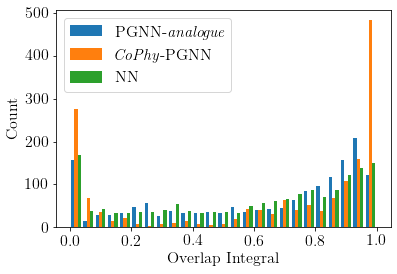

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.hist(tensors, density=False, bins=25, label=labels) 
plt.ylabel('Count')
plt.xlabel(getAxisName(tensor_name));
plt.legend()

In [8]:
fig.savefig(os.path.join(folder_name, fileNameOutput), bbox_inches='tight')